In [1]:
import pandas as pd
import os
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory = 'Football_Games_Data'
csv_files = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    csv_files.append(f)
full_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
full_df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,GBH,GBD,GBA,BSH,BSD,BSA
0,E0,16/08/14,Arsenal,Crystal Palace,2.0,1.0,H,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,16/08/14,Leicester,Everton,2.0,2.0,D,1.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,16/08/14,Man United,Swansea,1.0,2.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,16/08/14,QPR,Hull,0.0,1.0,A,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,16/08/14,Stoke,Aston Villa,0.0,1.0,A,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,E0,23/05/2021,Liverpool,Crystal Palace,2.0,0.0,H,1.0,0.0,H,...,1.98,2.14,1.88,2.00,NaN,NaN,NaN,NaN,NaN,NaN
3797,E0,23/05/2021,Man City,Everton,5.0,0.0,H,2.0,0.0,H,...,2.20,2.00,2.03,1.85,NaN,NaN,NaN,NaN,NaN,NaN
3798,E0,23/05/2021,Sheffield United,Burnley,1.0,0.0,H,1.0,0.0,H,...,2.17,1.90,2.03,1.84,NaN,NaN,NaN,NaN,NaN,NaN
3799,E0,23/05/2021,West Ham,Southampton,3.0,0.0,H,2.0,0.0,H,...,2.06,2.01,1.99,1.89,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
new_games_df = full_df.loc[:, ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST',\
                                'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']]
new_games_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,16/08/14,Arsenal,Crystal Palace,2.0,1.0,14.0,4.0,6.0,2.0,9.0,3.0,13.0,19.0,2.0,2.0,0.0,1.0
1,16/08/14,Leicester,Everton,2.0,2.0,11.0,13.0,3.0,3.0,3.0,6.0,16.0,10.0,1.0,1.0,0.0,0.0
2,16/08/14,Man United,Swansea,1.0,2.0,14.0,5.0,5.0,4.0,4.0,0.0,14.0,20.0,2.0,4.0,0.0,0.0
3,16/08/14,QPR,Hull,0.0,1.0,19.0,11.0,6.0,4.0,8.0,9.0,10.0,10.0,1.0,2.0,0.0,0.0
4,16/08/14,Stoke,Aston Villa,0.0,1.0,12.0,7.0,2.0,2.0,2.0,8.0,14.0,9.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,23/05/2021,Liverpool,Crystal Palace,2.0,0.0,19.0,5.0,5.0,4.0,14.0,1.0,10.0,8.0,2.0,2.0,0.0,0.0
3797,23/05/2021,Man City,Everton,5.0,0.0,21.0,8.0,11.0,3.0,7.0,5.0,8.0,10.0,2.0,2.0,0.0,0.0
3798,23/05/2021,Sheffield United,Burnley,1.0,0.0,12.0,10.0,3.0,3.0,8.0,9.0,11.0,1.0,3.0,1.0,0.0,0.0
3799,23/05/2021,West Ham,Southampton,3.0,0.0,14.0,17.0,7.0,5.0,2.0,3.0,5.0,9.0,0.0,3.0,0.0,0.0


In [4]:
renamed_df = new_games_df.rename(columns={"FTHG":"Full Time Home Team Goals", 
                                          "FTAG":"Full Time Away Team Goals",
                                         "HS":"Home Team Shots",
                                         "AS":"Away Team Shots",
                                         "HST":"Home Team Shots on Target",
                                         "AST":"Away Team Shots on Target",
                                         "HC":"Home Team Corners",
                                         "AC":"Away Team Corners",
                                         "HF":"Home Team Fouls Committed",
                                         "AF":"Away Team Fouls Committed",
                                         "HY":"Home Team Yellow Cards",
                                         "AY":"Away Team Yellow Cards",
                                         "HR":"Home Team Red Cards",
                                         "AR":"Away Team Red Cards"})
renamed_df

,Date,HomeTeam,AwayTeam,Full Time Home Team Goals,Full Time Away Team Goals,Home Team Shots,Away Team Shots,Home Team Shots on Target,Away Team Shots on Target,Home Team Corners,Away Team Corners,Home Team Fouls Committed,Away Team Fouls Committed,Home Team Yellow Cards,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards
0,16/08/14,Arsenal,Crystal Palace,2.0,1.0,14.0,4.0,6.0,2.0,9.0,3.0,13.0,19.0,2.0,2.0,0.0,1.0
1,16/08/14,Leicester,Everton,2.0,2.0,11.0,13.0,3.0,3.0,3.0,6.0,16.0,10.0,1.0,1.0,0.0,0.0
2,16/08/14,Man United,Swansea,1.0,2.0,14.0,5.0,5.0,4.0,4.0,0.0,14.0,20.0,2.0,4.0,0.0,0.0
3,16/08/14,QPR,Hull,0.0,1.0,19.0,11.0,6.0,4.0,8.0,9.0,10.0,10.0,1.0,2.0,0.0,0.0
4,16/08/14,Stoke,Aston Villa,0.0,1.0,12.0,7.0,2.0,2.0,2.0,8.0,14.0,9.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,23/05/2021,Liverpool,Crystal Palace,2.0,0.0,19.0,5.0,5.0,4.0,14.0,1.0,10.0,8.0,2.0,2.0,0.0,0.0
3797,23/05/2021,Man City,Everton,5.0,0.0,21.0,8.0,11.0,3.0,7.0,5.0,8.0,10.0,2.0,2.0,0.0,0.0
3798,23/05/2021,Sheffield United,Burnley,1.0,0.0,12.0,10.0,3.0,3.0,8.0,9.0,11.0,1.0,3.0,1.0,0.0,0.0
3799,23/05/2021,West Ham,Southampton,3.0,0.0,14.0,17.0,7.0,5.0,2.0,3.0,5.0,9.0,0.0,3.0,0.0,0.0


In [5]:
team_goals = {}

home_goals = renamed_df.groupby('HomeTeam')['Full Time Home Team Goals'].sum()
away_goals = renamed_df.groupby('AwayTeam')['Full Time Away Team Goals'].sum()

for team, goals in home_goals.iteritems():
    if team in team_goals:
        team_goals[team] += goals
    else:
        team_goals[team] = goals
        
        
for team, goals in away_goals.iteritems():
    if team in team_goals:
        team_goals[team] += goals
    else:
        team_goals[team] = goals
        
total_goals = pd.DataFrame({'Team': list(team_goals.keys()), 'Total Goals': list(team_goals.values())})

total_goals = total_goals.sort_values(by='Total Goals', ascending=False)

print(total_goals)

                Team  Total Goals
16          Man City        887.0
15         Liverpool        785.0
7            Chelsea        691.0
28         Tottenham        673.0
0            Arsenal        672.0
17        Man United        644.0
9            Everton        517.0
31          West Ham        512.0
24       Southampton        480.0
14         Leicester        466.0
8     Crystal Palace        387.0
19         Newcastle        381.0
1        Aston Villa        292.0
30         West Brom        277.0
27           Swansea        262.0
5            Burnley        258.0
29           Watford        246.0
25             Stoke        244.0
2        Bournemouth        241.0
4           Brighton        190.0
26        Sunderland        190.0
33            Wolves        172.0
20           Norwich        157.0
10            Fulham        151.0
12              Hull        108.0
13             Leeds        104.0
21               QPR         72.0
6            Cardiff         66.0
23  Sheffield 

In [6]:
goals_per_team = {}

home_goals_per_team = renamed_df.groupby('HomeTeam')['Full Time Home Team Goals'].sum()
away_goals_per_team = renamed_df.groupby('AwayTeam')['Full Time Away Team Goals'].sum()

# Iterate over the home team goals and add them to the dictionary
for team, goals in home_goals_per_team.iteritems():
    if team in goals_per_team:
        goals_per_team[team]['Home Goals'] += goals
    else:
        goals_per_team[team] = {'Home Goals': goals, 'Away Goals': 0}

# Iterate over the away team goals and add them to the dictionary
for team, goals in away_goals_per_team.iteritems():
    if team in goals_per_team:
        goals_per_team[team]['Away Goals'] += goals
    else:
        goals_per_team[team] = {'Home Goals': 0, 'Away Goals': goals}

        
home_away_goals = pd.DataFrame(goals_per_team).T.reset_index()

home_away_goals.columns = ['Team', 'Home Goals', 'Away Goals']

home_away_goals = home_away_goals.sort_values(by='Home Goals', ascending=False)

print(home_away_goals.head(9))

           Team  Home Goals  Away Goals
16     Man City       508.0       379.0
15    Liverpool       424.0       361.0
0       Arsenal       385.0       287.0
7       Chelsea       374.0       317.0
28    Tottenham       355.0       318.0
17   Man United       349.0       295.0
9       Everton       308.0       209.0
31     West Ham       288.0       224.0
24  Southampton       270.0       210.0


In [21]:
shots_per_team = {}

home_shots_per_team = renamed_df.groupby('HomeTeam')['Home Team Shots'].sum()
away_shots_per_team = renamed_df.groupby('AwayTeam')['Away Team Shots'].sum()

# Iterate over the home team goals and add them to the dictionary
for team, shots in home_shots_per_team.iteritems():
    if team in shots_per_team:
        shots_per_team[team]['Home Shots'] += shots
    else:
        shots_per_team[team] = {'Home Shots': shots, 'Away Shots': 0}

# Iterate over the away team goals and add them to the dictionary
for team, shots in away_shots_per_team.iteritems():
    if team in shots_per_team:
        shots_per_team[team]['Away Shots'] += shots
    else:
        shots_per_team[team] = {'Home Shots': 0, 'Away Shots': shots}

        
home_away_shots = pd.DataFrame(shots_per_team).T.reset_index()

home_away_shots.columns = ['Team', 'Home Shots', 'Away Shots']

home_away_shots = home_away_shots.sort_values(by='Home Shots', ascending = False)

home_away_shots['Total Shots'] = home_away_shots['Home Shots'] + home_away_shots['Away Shots']


print(home_away_shots.head(9))

           Team  Home Shots  Away Shots  Total Shots
16     Man City      3544.0      3054.0       6598.0
15    Liverpool      3524.0      2794.0       6318.0
7       Chelsea      3269.0      2649.0       5918.0
28    Tottenham      3080.0      2513.0       5593.0
0       Arsenal      3018.0      2317.0       5335.0
17   Man United      2860.0      2316.0       5176.0
24  Southampton      2643.0      2270.0       4913.0
9       Everton      2607.0      2151.0       4758.0
31     West Ham      2475.0      2051.0       4526.0


In [20]:
shots_per_team = {}

home_shots_per_team = renamed_df.groupby('HomeTeam')['Home Team Shots on Target'].sum()
away_shots_per_team = renamed_df.groupby('AwayTeam')['Away Team Shots on Target'].sum()

# Iterate over the home team goals and add them to the dictionary
for team, shots in home_shots_per_team.iteritems():
    if team in shots_per_team:
        shots_per_team[team]['Home Shots'] += shots
    else:
        shots_per_team[team] = {'Home Shots': shots, 'Away Shots': 0}

# Iterate over the away team goals and add them to the dictionary
for team, shots in away_shots_per_team.iteritems():
    if team in shots_per_team:
        shots_per_team[team]['Away Shots'] += shots
    else:
        shots_per_team[team] = {'Home Shots': 0, 'Away Shots': shots}

        
home_away_shots = pd.DataFrame(shots_per_team).T.reset_index()

home_away_shots.columns = ['Team', 'Home Shots', 'Away Shots']

home_away_shots = home_away_shots.sort_values(by='Home Shots', ascending = False)

home_away_shots['Total Shots'] = home_away_shots['Home Shots'] + home_away_shots['Away Shots']


print(home_away_shots.head(9))

           Team  Home Shots  Away Shots  Total Shots
16     Man City      1358.0      1144.0       2502.0
15    Liverpool      1340.0      1097.0       2437.0
7       Chelsea      1272.0       940.0       2212.0
28    Tottenham      1202.0       987.0       2189.0
0       Arsenal      1191.0       887.0       2078.0
17   Man United      1106.0       927.0       2033.0
9       Everton       973.0       815.0       1788.0
24  Southampton       951.0       822.0       1773.0
31     West Ham       881.0       738.0       1619.0


In [8]:
all_teams = pd.concat([renamed_df['HomeTeam'], renamed_df['AwayTeam']])
games_played_per_team = all_teams.value_counts()
print(games_played_per_team.head(9))

Arsenal        380
Man United     380
Man City       380
Tottenham      380
West Ham       380
Liverpool      380
Southampton    380
Everton        380
Chelsea        380
dtype: int64


In [39]:
top_9_df = pd.DataFrame({'Teams': ['Arsenal', 'Man United', 'Man City', 'Tottenham', 'West Ham', 
                                    'Liverpool', 'Southampton', 'Everton', 'Chelsea'],
                        'Games Played': [380, 380, 380, 380, 380, 380, 380, 380, 380],
                        'Home Goals': [385.0, 349.0, 508.0, 355.0, 288.0, 424.0, 270.0,
                                            308.0, 374.0],
                        'Away Goals': [287.0, 295.0, 379.0, 318.0, 224.0, 361.0,
                                            210.0, 209.0, 317.0], 
                        'Total Goals': [672.0, 644.0, 887.0, 673.0, 512.0, 785.0, 480.0, 
                                       517.0, 691.0],
                        'Home Shots on Target': [1191.0, 1106.0, 1358.0, 1202.0, 881.0, 1340.0,
                                      951.0, 973.0, 1272.0],
                        'Away Shots on Target': [887.0, 927.0, 1144.0, 987.0, 738.0, 1097.0,
                                      1097.0, 822.0, 940.0],
                        'Total Shots on Target': [2078.0, 2033.0, 2502.0, 2189.0, 1619.0, 2437.0,
                                       1773.0, 1788.0, 2212.0],
                        'Home Shots':[3018.0, 2860.0, 3544.0, 3080.0, 2475.0, 3524.0, 2643.0,
                                     2607.0, 3269.0],
                        'Away Shots': [2317.0, 2316.0, 3054.0, 2513.0, 2051.0, 2794.0,
                                      2270.0, 2151.0, 2649.0],
                        'Total Shots': [5335.0, 5176.0, 6598.0, 5593.0, 4526.0, 6318.0,
                                       4913.0, 4758.0, 5918.0]})

top_9_df

,Teams,Games Played,Home Goals,Away Goals,Total Goals,Home Shots on Target,Away Shots on Target,Total Shots on Target,Home Shots,Away Shots,Total Shots
0,Arsenal,380,385.0,287.0,672.0,1191.0,887.0,2078.0,3018.0,2317.0,5335.0
1,Man United,380,349.0,295.0,644.0,1106.0,927.0,2033.0,2860.0,2316.0,5176.0
2,Man City,380,508.0,379.0,887.0,1358.0,1144.0,2502.0,3544.0,3054.0,6598.0
3,Tottenham,380,355.0,318.0,673.0,1202.0,987.0,2189.0,3080.0,2513.0,5593.0
4,West Ham,380,288.0,224.0,512.0,881.0,738.0,1619.0,2475.0,2051.0,4526.0
5,Liverpool,380,424.0,361.0,785.0,1340.0,1097.0,2437.0,3524.0,2794.0,6318.0
6,Southampton,380,270.0,210.0,480.0,951.0,1097.0,1773.0,2643.0,2270.0,4913.0
7,Everton,380,308.0,209.0,517.0,973.0,822.0,1788.0,2607.0,2151.0,4758.0
8,Chelsea,380,374.0,317.0,691.0,1272.0,940.0,2212.0,3269.0,2649.0,5918.0


In [40]:
top_9_df['Scoring Efficiency (on target)'] = top_9_df['Total Goals'] / top_9_df['Total Shots on Target']*100
top_9_df['Scoring Efficiency (total)'] = top_9_df['Total Goals'] / top_9_df['Total Shots']*100
top_9_df['Scoring Efficiency (on target)'] = top_9_df['Scoring Efficiency (on target)'].round(2)
top_9_df['Scoring Efficiency (total)'] = top_9_df['Scoring Efficiency (total)'].round(2)
top_9_df['Scoring Efficiency Home (on target)'] = top_9_df['Home Goals'] / top_9_df['Home Shots on Target']*100
top_9_df['Scoring Efficiency Away (on target)'] = top_9_df['Away Goals'] / top_9_df['Away Shots on Target']*100


top_9_df['Scoring Efficiency Home (on target)'] = top_9_df['Scoring Efficiency Home (on target)'].round(2)
top_9_df['Scoring Efficiency Away (on target)'] = top_9_df['Scoring Efficiency Away (on target)'].round(2)
top_9_df

,Teams,Games Played,Home Goals,Away Goals,Total Goals,Home Shots on Target,Away Shots on Target,Total Shots on Target,Home Shots,Away Shots,Total Shots,Scoring Efficiency (on target),Scoring Efficiency (total),Scoring Efficiency Home (on target),Scoring Efficiency Away (on target)
0,Arsenal,380,385.0,287.0,672.0,1191.0,887.0,2078.0,3018.0,2317.0,5335.0,32.34,12.60,32.33,32.36
1,Man United,380,349.0,295.0,644.0,1106.0,927.0,2033.0,2860.0,2316.0,5176.0,31.68,12.44,31.56,31.82
2,Man City,380,508.0,379.0,887.0,1358.0,1144.0,2502.0,3544.0,3054.0,6598.0,35.45,13.44,37.41,33.13
3,Tottenham,380,355.0,318.0,673.0,1202.0,987.0,2189.0,3080.0,2513.0,5593.0,30.74,12.03,29.53,32.22
4,West Ham,380,288.0,224.0,512.0,881.0,738.0,1619.0,2475.0,2051.0,4526.0,31.62,11.31,32.69,30.35
5,Liverpool,380,424.0,361.0,785.0,1340.0,1097.0,2437.0,3524.0,2794.0,6318.0,32.21,12.42,31.64,32.91
6,Southampton,380,270.0,210.0,480.0,951.0,1097.0,1773.0,2643.0,2270.0,4913.0,27.07,9.77,28.39,19.14
7,Everton,380,308.0,209.0,517.0,973.0,822.0,1788.0,2607.0,2151.0,4758.0,28.91,10.87,31.65,25.43
8,Chelsea,380,374.0,317.0,691.0,1272.0,940.0,2212.0,3269.0,2649.0,5918.0,31.24,11.68,29.40,33.72


In [41]:
top_9_df['Shot Accuracy'] = top_9_df['Total Shots on Target'] / top_9_df['Total Shots'] * 100
top_9_df['Shot Accuracy (home)'] = top_9_df['Home Shots on Target'] / top_9_df['Home Shots'] * 100
top_9_df['Shot Accuracy (away)'] = top_9_df['Away Shots on Target'] / top_9_df['Away Shots'] * 100
top_9_df

,Teams,Games Played,Home Goals,Away Goals,Total Goals,Home Shots on Target,Away Shots on Target,Total Shots on Target,Home Shots,Away Shots,Total Shots,Scoring Efficiency (on target),Scoring Efficiency (total),Scoring Efficiency Home (on target),Scoring Efficiency Away (on target),Shot Accuracy,Shot Accuracy (home),Shot Accuracy (away)
0,Arsenal,380,385.0,287.0,672.0,1191.0,887.0,2078.0,3018.0,2317.0,5335.0,32.34,12.60,32.33,32.36,38.950328,39.463221,38.282262
1,Man United,380,349.0,295.0,644.0,1106.0,927.0,2033.0,2860.0,2316.0,5176.0,31.68,12.44,31.56,31.82,39.277434,38.671329,40.025907
2,Man City,380,508.0,379.0,887.0,1358.0,1144.0,2502.0,3544.0,3054.0,6598.0,35.45,13.44,37.41,33.13,37.920582,38.318284,37.459070
3,Tottenham,380,355.0,318.0,673.0,1202.0,987.0,2189.0,3080.0,2513.0,5593.0,30.74,12.03,29.53,32.22,39.138208,39.025974,39.275766
4,West Ham,380,288.0,224.0,512.0,881.0,738.0,1619.0,2475.0,2051.0,4526.0,31.62,11.31,32.69,30.35,35.771100,35.595960,35.982448
5,Liverpool,380,424.0,361.0,785.0,1340.0,1097.0,2437.0,3524.0,2794.0,6318.0,32.21,12.42,31.64,32.91,38.572333,38.024972,39.262706
6,Southampton,380,270.0,210.0,480.0,951.0,1097.0,1773.0,2643.0,2270.0,4913.0,27.07,9.77,28.39,19.14,36.087930,35.981839,48.325991
7,Everton,380,308.0,209.0,517.0,973.0,822.0,1788.0,2607.0,2151.0,4758.0,28.91,10.87,31.65,25.43,37.578815,37.322593,38.214784
8,Chelsea,380,374.0,317.0,691.0,1272.0,940.0,2212.0,3269.0,2649.0,5918.0,31.24,11.68,29.40,33.72,37.377492,38.910982,35.485089


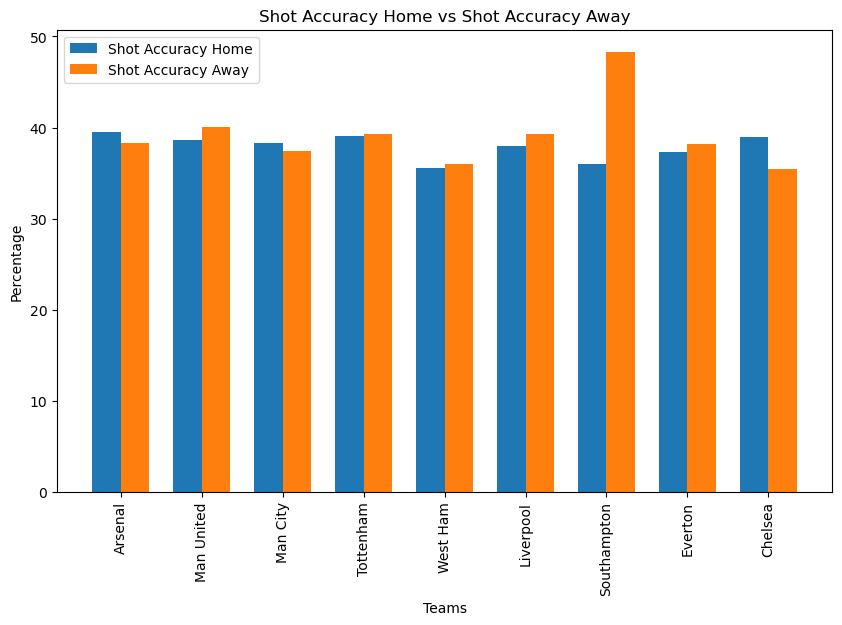

In [47]:
# Assuming the data is stored in a DataFrame called top_9_df
teams = top_9_df['Teams']
shot_accuracy_home = top_9_df['Shot Accuracy (home)']
shot_accuracy_away = top_9_df['Shot Accuracy (away)']

# Set the width of each column
bar_width = 0.35

# Set the positions of the bars on the x-axis
index = np.arange(len(teams))

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.bar(index, shot_accuracy_home, bar_width, label='Shot Accuracy Home')
plt.bar(index + bar_width, shot_accuracy_away, bar_width, label='Shot Accuracy Away')

# Add labels and title
plt.xlabel('Teams')
plt.ylabel('Percentage')
plt.title('Shot Accuracy Home vs Shot Accuracy Away')
plt.xticks(index + bar_width/2, teams, rotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.show()



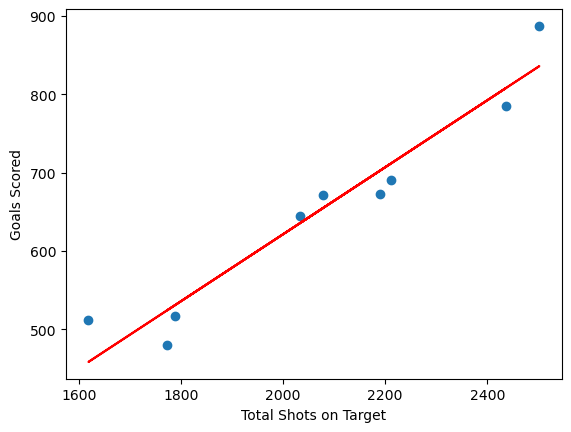

In [54]:
x_values = top_9_df['Total Shots on Target']
y_values = top_9_df['Total Goals']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel('Total Shots on Target')
plt.ylabel('Goals Scored')
plt.show()
